# Keras Regression Code Along Project

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### The problem
* Develop a neural network model to predict the house price based on the above features.

In [46]:
#
# Your code to import libraries, numpy, pandas, matplotlib,  seaborn
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Your code to read the data from the file provided.
import pandas as pd

# Assuming your file is a CSV file named 'data.csv'
file_path = 'kc_house_data.csv'

# Read the data into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been read correctly
print(data.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Exploratory Data Analysis

Perform some data analysis using the libraries above.
Visualise the features to understand the problem and use the appropriate features for the model.

In [48]:
# Your code to check if any null value is present in the dataset. Hint - use isnull() in pandas
# Check for null values in the dataset
null_values = data.isnull().sum()

# Display the count of null values for each column
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [49]:
# Your code to describe the dataset to get imortant properties of it.
# Describe the dataset to get important properties
description = data.describe()

# Display the description of the dataset
print("Description of the dataset:")
print(description)

Description of the dataset:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04    

# Let's see how price columns look like i.e. how prices are distributed.

C:\Users\Benja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


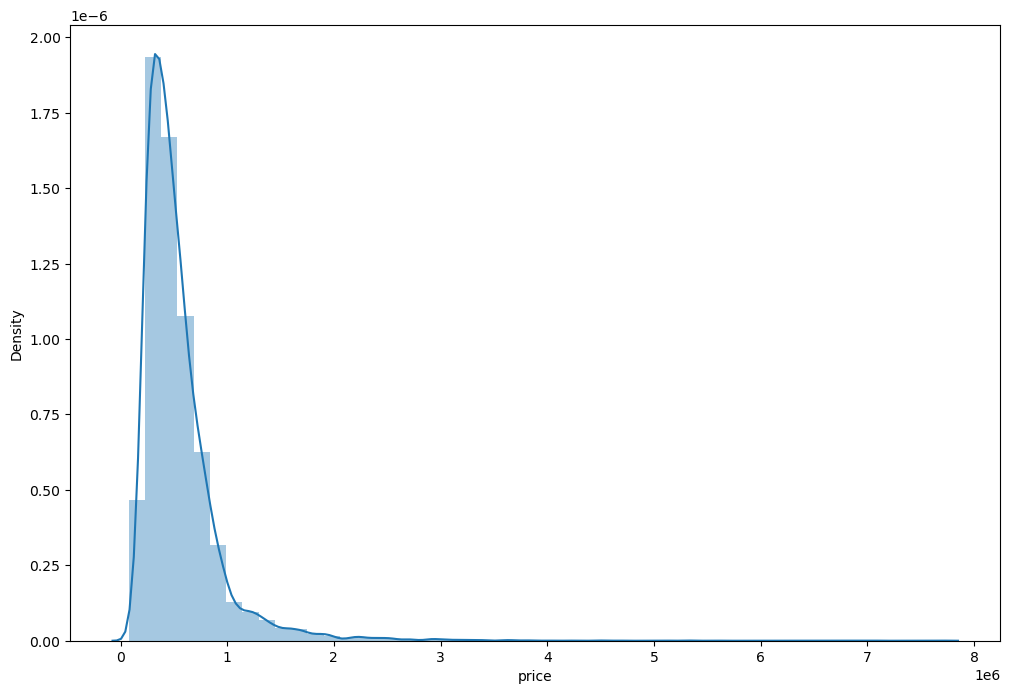

In [50]:
plt.figure(figsize=(12,8))
sns.distplot(data['price'])
plt.show()

#### Let's look at the columns - number of bedroom in more detail
#### Write code to plot the numbers of bedrooms and the number of times they appear in the data.  
####The x-axis contains the number of bedrroms and the y axis will portray the number of times the particular bedroom appears in the column.

#### Hint - use sns.countplot.  

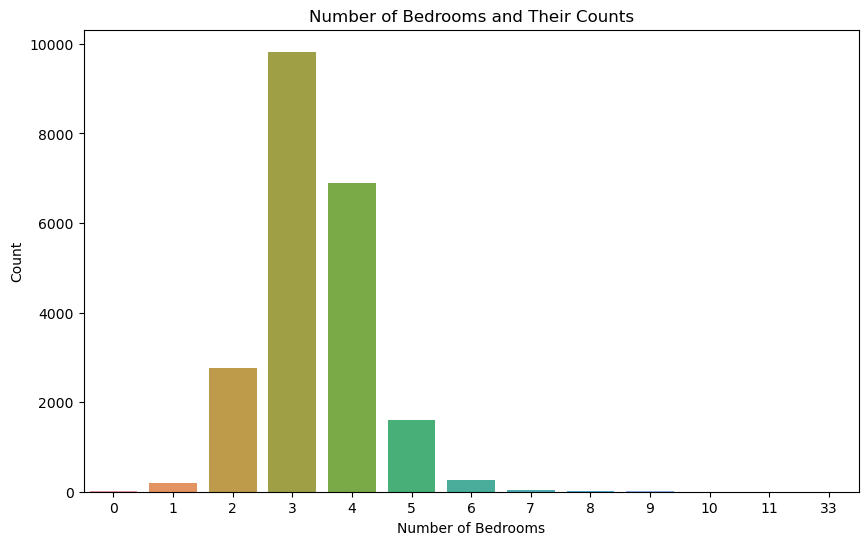

In [51]:
# Your code to plot number of bedrooms and their counts
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=data)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Number of Bedrooms and Their Counts')
plt.show()

# Plot a scatter plot between the price and sqft_living column.

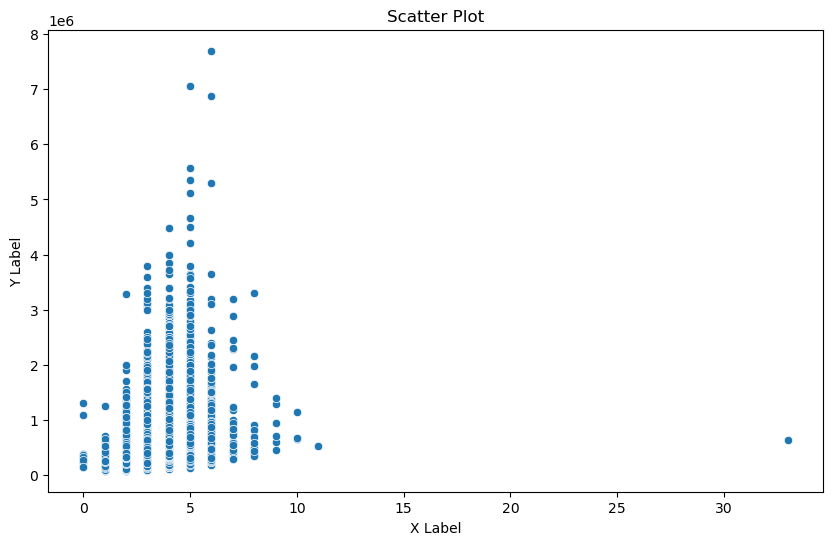

In [52]:
# You code to visualize an scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Scatter Plot')
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

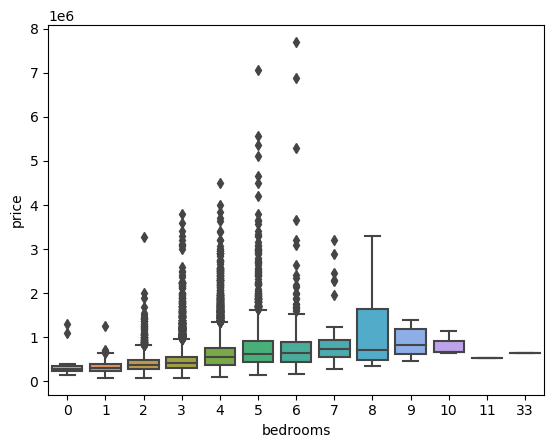

In [53]:
sns.boxplot(x='bedrooms', y='price', data=data)

### Geographical Properties

Visulaize an scatter plot between price and longitude (long) and latidtude (lat)  columns.



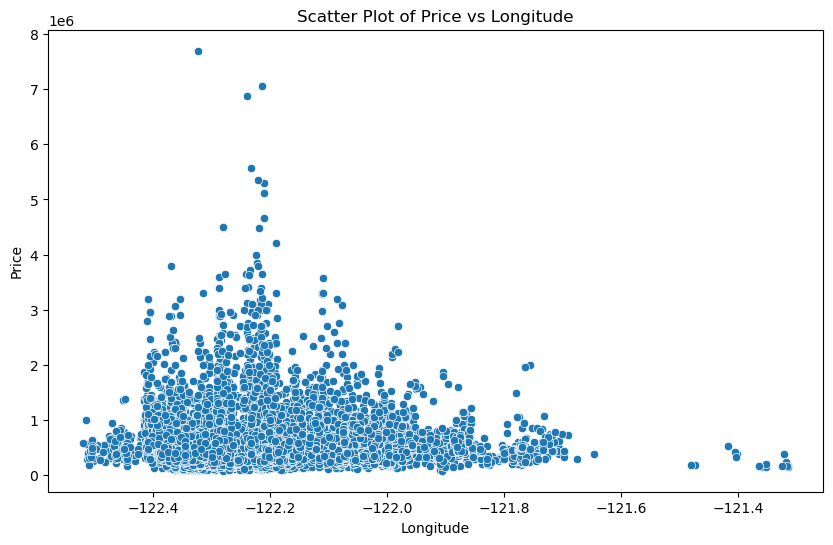

In [54]:
# Your code to visualize an scatter plot between price and longitude (long) column.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='price', data=data)
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Longitude')
plt.show()

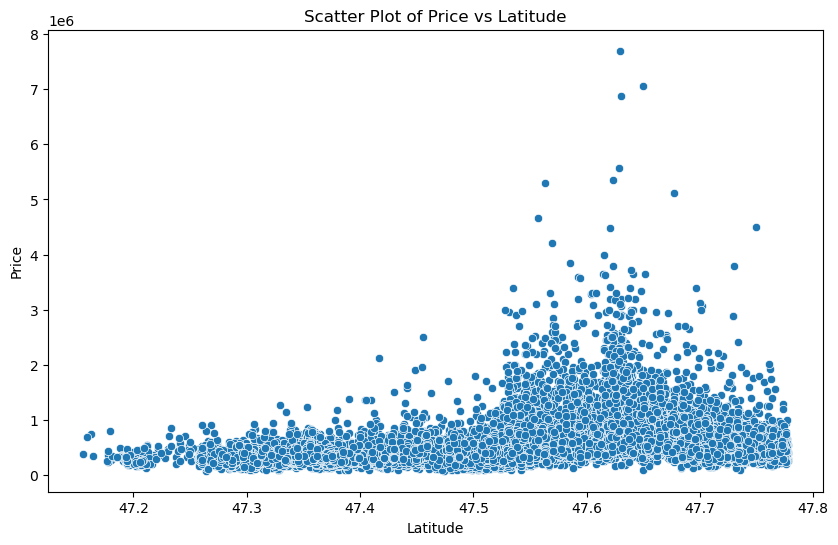

In [55]:
# Your code to visualize an scatter plot between price and latitude(lat) column.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='price', data=data)
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Latitude')
plt.show()

<AxesSubplot:xlabel='long', ylabel='lat'>

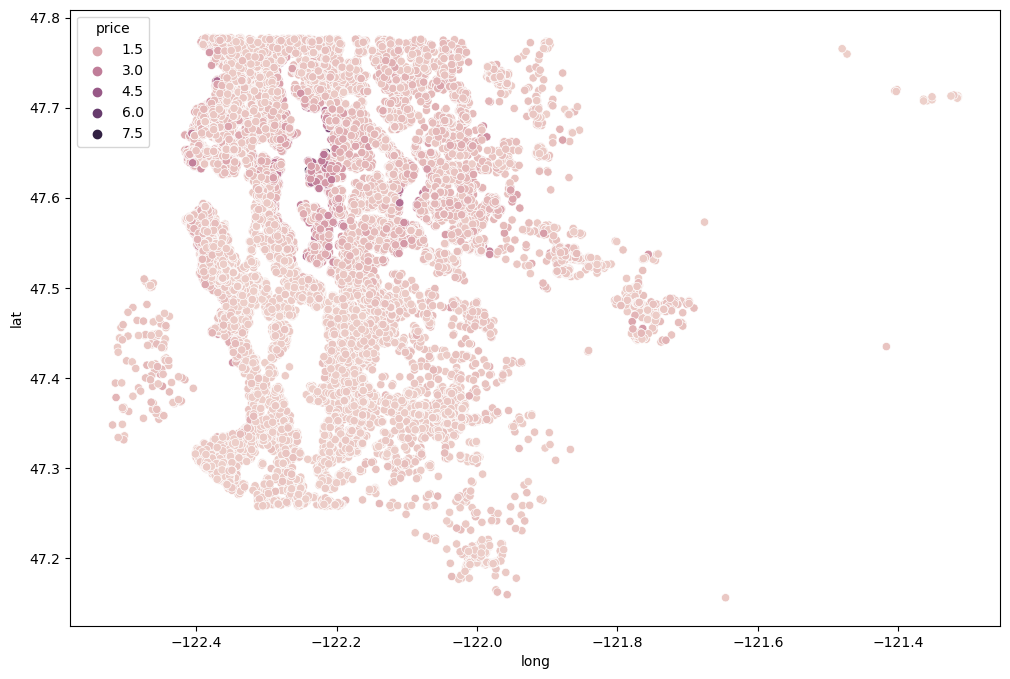

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=data, hue='price')

# Sort the values in the dataframe according to price and print first few rows.

In [57]:
# Your code to sort data frame according to the price (ascending order) and see first few rows. 
# Hint - Use df.sort_values and combine it with head()
# Sort the DataFrame by 'price' column in ascending order and display the first few rows
sorted_data = data.sort_values(by='price', ascending=True)
print(sorted_data.head())

               id             date    price  bedrooms  bathrooms  sqft_living  \
1149   3421079032  20150217T000000  75000.0         1       0.00          670   
15293    40000362  20140506T000000  78000.0         2       1.00          780   
465    8658300340  20140523T000000  80000.0         1       0.75          430   
16198  3028200080  20150324T000000  81000.0         2       1.00          730   
8274   3883800011  20141105T000000  82000.0         3       1.00          860   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149      43377     1.0           0     0  ...      3         670   
15293     16344     1.0           0     0  ...      5         780   
465        5050     1.0           0     0  ...      4         430   
16198      9975     1.0           0     0  ...      5         730   
8274      10426     1.0           0     0  ...      6         860   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1149               0   

#### The following code visualizes the price intensity with the latitude and longitude for 1% and 99% of the data separately.

#### You need to add comment on each line of the code.

In [ ]:
# Calculate the number of rows corresponding to 1% of the data
len(df)*(0.01)

In [ ]:
# Extract the bottom 99% of the data by sorting the DataFrame by 'price' in descending order and excluding the top 1%
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
non_top_1_perc

In [ ]:
# Set up the figure size for the scatter plot
# Create a scatter plot with latitude and longitude as axes, using the bottom 99% of the data, with price as the hue
# Use a green-red colormap ('RdYlGn') to represent price intensity, with low prices in green and high prices in red
# Set edgecolor to None to remove edge colors around points, and set alpha to 0.2 for transparency
plt.figure(figsize=(12,8))

sns.scatterplot(x='long',y='lat', 
                data=non_top_1_perc,hue='price', 
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features
# Let's have a box plot between waterfront and price.

# Explain what box plot is doing?

<AxesSubplot:xlabel='waterfront', ylabel='price'>

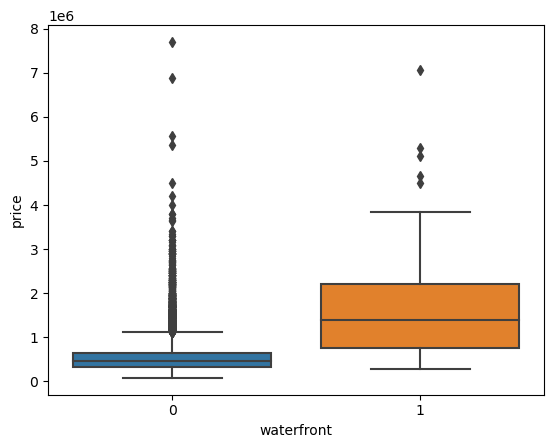

In [59]:
sns.boxplot(x='waterfront', y='price', data=data)

## Working with Feature Data

In [60]:
# Your code to print first few rows of the data.
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [61]:
# Your code to print info about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Following code is dropping the column ID.

Question - why are dropping this column?

In [62]:
# Dropping the 'id' column is often done to eliminate the redundancy of 
#reducing memory footprint, and avoiding overfitting in order 
#to streamline the dataset for analysis or modeling purposes.
df = df.drop('id',axis=1)

NameError: name 'df' is not defined

### Feature Engineering from Date

Transform the features into useful formats to apply appropriate Deep NN technique!

In [63]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)

#Your code to check what above code is doing.
# Print the first few rows to check the result
print(data[['date', 'month', 'year']].head())

        date  month  year
0 2014-10-13     10  2014
1 2014-12-09     12  2014
2 2015-02-25      2  2015
3 2014-12-09     12  2014
4 2015-02-18      2  2015


<AxesSubplot:xlabel='year', ylabel='price'>

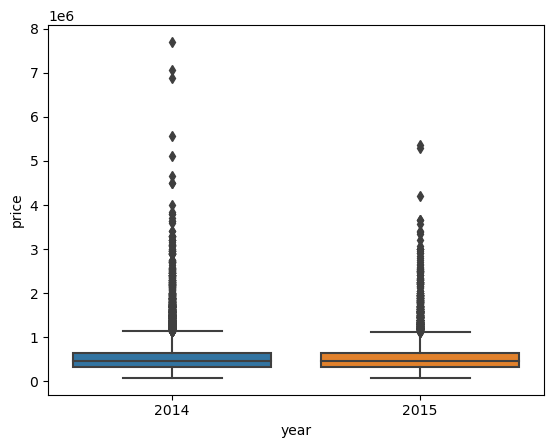

In [64]:
sns.boxplot(x='year', y='price', data=data)

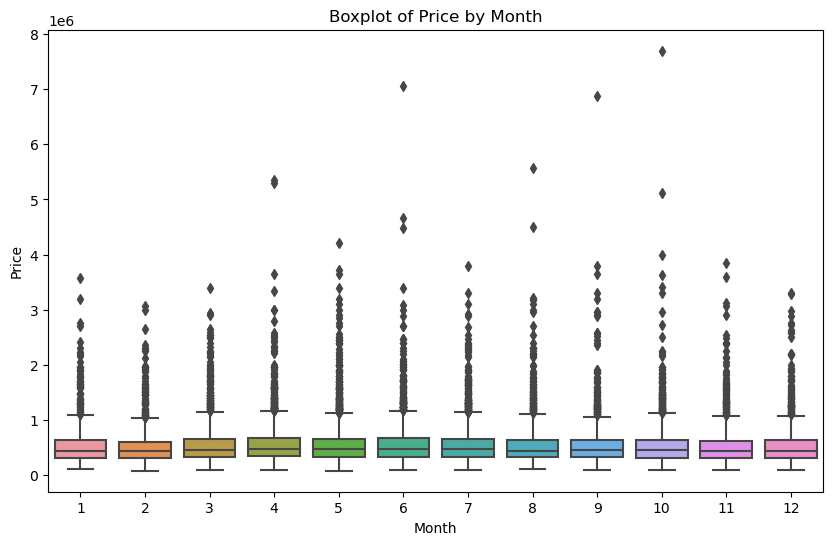

In [65]:
# Your code to visualize boxplot between month and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=data)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Boxplot of Price by Month')
plt.show()

In [66]:
# we do not need the 'date' column anymore

data = data.drop('date', axis=1)

In [67]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [68]:
data['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Should we remove zipcode?  If so, remove it.

In [84]:
# Your code to remove zip code - Hint - Use df.drop
# Your code to remove 'date' column.
if 'zipcode' in df.columns:
    df = df.drop('zipcode', axis=1)

if 'date' in df.columns:
    df = df.drop('date', axis=1)

In [85]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [86]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [87]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

Scikit-Learn is used to split out the train-test library.

First separate input and output. Input will be stored in the variable X and output in variable y.

In [88]:
# Your code to store all columns except price column in variable X. Hint - Use pd.drop()
# Your code to store output (price column) in variable y
# Store all columns except 'price' in X
X = df.drop('price', axis=1)

# Store the 'price' column in y
y = df['price']

In [89]:
from sklearn.model_selection import train_test_split


In [90]:
# Your code to separate X and y into X_train, X_test, y_train, y_test i.e. getting training and testing set for the model.

# You can choose your unique test data size as a percentage of the original dataset. 
# It is better to consider the range from 15 to 35% 
from sklearn.model_selection import train_test_split

# Define the test data size (e.g., 20%)
test_size = 0.2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [91]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 20) (4323, 20) (17290,) (4323,)


### Scaling

Features are scaled to be in a proper range to be useful for modeling.
Scaling converts all values between 0-1.

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data, such as the mean and variance of the features of the training set. These learned and fixed parameters are then used to scale our test data with the transform() function.

In [93]:
# Your code to print shapes of X_train, X_test, y_train, y_test and see if shapes are okay.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (17290, 20)
Shape of X_test: (4323, 20)
Shape of y_train: (17290,)
Shape of y_test: (4323,)


## Creating a Model

Build a Deep NN model with appropriate layers using Keras.  

In [94]:
#
# Import Libraries for Neural Network model development.
#
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

Develop your own Neural Network model with suitable number of input, output, and any number of hidden layers. Since we are predicting a value, the number of neurons in outpit layer should be one.

In [95]:
#
# Your code to build MLP neural network model.
#
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


## Training the Model

Write the code to train the neural network model. Use the following of your choice:



1.   Optimization method
2.   Batch size
3.   Number of epochs.

Test for various optimizers and check which one performs better in terms of loss function = 'mse'.

Use following APIs
* https://keras.io/api/optimizers/
* https://keras.io/api/losses/regression_losses/
* https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
* https://keras.io/api/models/model_training_apis/



In [96]:
# ! add your chosen optimiser !
# Import the Adam optimizer
chosen_optimizer = 'Adam'

# Compile the model with the chosen optimizer
model.compile(optimizer=chosen_optimizer, loss='mean_squared_error')

# Define the batch size and number of epochs
batch_size = 32
epochs = 50  # You can adjust this value as needed

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/50
541/541 [==============================] - 3s 3ms/step - loss: 418647212032.0000 - val_loss: 447876300800.0000
Epoch 2/50
541/541 [==============================] - 2s 3ms/step - loss: 401766645760.0000 - val_loss: 414645551104.0000
Epoch 3/50
541/541 [==============================] - 1s 3ms/step - loss: 351833128960.0000 - val_loss: 345748340736.0000
Epoch 4/50
541/541 [==============================] - 2s 3ms/step - loss: 273812897792.0000 - val_loss: 257708392448.0000
Epoch 5/50
541/541 [==============================] - 2s 3ms/step - loss: 192163086336.0000 - val_loss: 180423622656.0000
Epoch 6/50
541/541 [==============================] - 2s 3ms/step - loss: 134075269120.0000 - val_loss: 136011939840.0000
Epoch 7/50
541/541 [==============================] - 2s 3ms/step - loss: 108167462912.0000 - val_loss: 120442748928.0000
Epoch 8/50
541/541 [==============================] - 1s 3ms/step - loss: 101398880256.0000 - val_loss: 116585873408.0000
Epoch 9/50
541/541 [====

In [97]:
#
# Your code to train the model.
#
# Import the Adam optimizer
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Define the batch size and number of epochs
batch_size = 32
epochs = 50  # You can adjust this value as needed

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50
541/541 [==============================] - 2s 3ms/step - loss: 418084356096.0000 - val_loss: 445410902016.0000
Epoch 2/50
541/541 [==============================] - 1s 3ms/step - loss: 391934148608.0000 - val_loss: 393532243968.0000
Epoch 3/50
541/541 [==============================] - 2s 3ms/step - loss: 316880093184.0000 - val_loss: 294606536704.0000
Epoch 4/50
541/541 [==============================] - 1s 3ms/step - loss: 215820779520.0000 - val_loss: 193007878144.0000
Epoch 5/50
541/541 [==============================] - 2s 3ms/step - loss: 138309943296.0000 - val_loss: 135357227008.0000
Epoch 6/50
541/541 [==============================] - 2s 3ms/step - loss: 107050147840.0000 - val_loss: 119239565312.0000
Epoch 7/50
541/541 [==============================] - 2s 3ms/step - loss: 100767473664.0000 - val_loss: 115930537984.0000
Epoch 8/50
541/541 [==============================] - 2s 3ms/step - loss: 99012976640.0000 - val_loss: 113962835968.0000
Epoch 9/50
541/541 [=====

# Following code gets the history of losses at every epoch.

<AxesSubplot:>

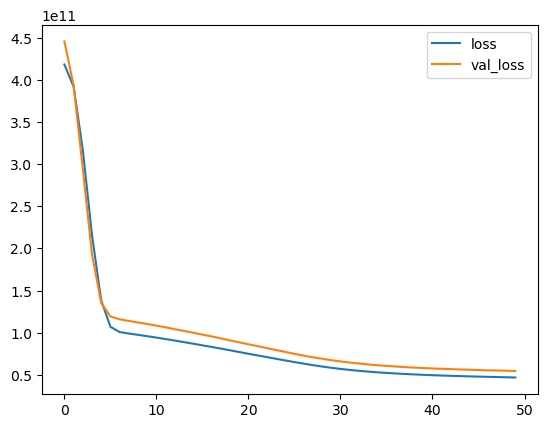

In [98]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Scikit-Learn has metrics to evaluate the performance.

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

#### Next, we will test the performance of our model by predicting on test dataset X_test.

In [102]:
# Your code to print X_test and see how test data looks like.
# Print the entire test dataset
print(X_test)

# If you want to print only the first few rows
print(X_test[:5])  # Print the first 5 rows

[[0.26172545 0.12121212 0.28125    ... 0.00809719 0.81818182 0.        ]
 [0.80545516 0.15151515 0.375      ... 0.00646948 0.63636364 0.        ]
 [0.7779018  0.12121212 0.3125     ... 0.01037736 0.63636364 0.        ]
 ...
 [0.17032024 0.12121212 0.3125     ... 0.00430648 0.81818182 0.        ]
 [0.41826446 0.12121212 0.21875    ... 0.01045203 1.         0.        ]
 [0.18400849 0.12121212 0.3125     ... 0.00614095 1.         0.        ]]
[[0.26172545 0.12121212 0.28125    0.15136054 0.00719161 0.4
  0.         0.         0.75       0.58333333 0.20770128 0.
  0.74782609 0.         0.45204593 0.29651163 0.34262605 0.00809719
  0.81818182 0.        ]
 [0.80545516 0.15151515 0.375      0.22193878 0.0053338  0.
  0.         0.         1.         0.58333333 0.17969662 0.2219917
  0.66956522 0.         0.83956008 0.19435216 0.33918431 0.00646948
  0.63636364 0.        ]
 [0.7779018  0.12121212 0.3125     0.29591837 0.00890941 0.4
  0.         0.5        0.5        0.83333333 0.40606768 0.
 

# Following you will predict the output based on the input data X_test.

Lonk to API - https://keras.io/api/models/model_training_apis/#predict-method

In [103]:
# Your code to make a predictions using (model.predict (<input_data>) method ). 
# Store the predictions in the variable predictions
predictions = model.predict(X_test)

136/136 [==============================] - 0s 2ms/step


## Following code will test the error in the predicted values. 
## Error is the difference between the predictions you made and real values (y_test)

In [104]:
print (mean_absolute_error(y_test, predictuons ))
print (np.sqrt(mean_squared_error())) # There is an error in this line. Fix the error.
print (explained_variance_score(y_test,predictions))

NameError: name 'predictuons' is not defined

The following code plots the predicted values in a scatter plot. We have also plotted the perfect predictions.

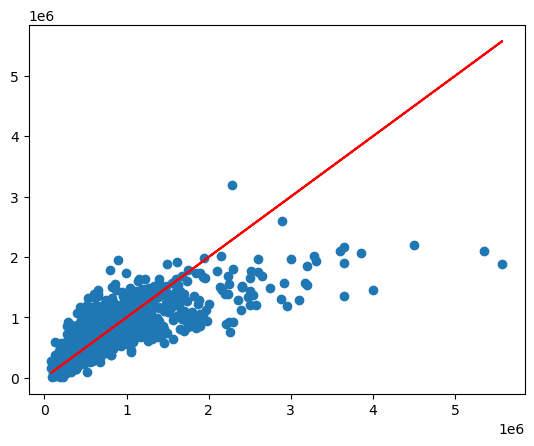

In [105]:
# Our predictions
plt.scatter(y_test, predictions)

# Perfect predictions
plt.plot(y_test, y_test, 'r')

In the following code, we have plotted the error i.e. the difference between the actual and predicted values.

In [106]:
errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors)

ValueError: cannot reshape array of size 4323 into shape (6484,1)


### Following code makes prediction on a brand new house. Comment each line of the code.

Try predicting price for a new home.

In [107]:
single_house = df.drop('price',axis=1).iloc[0]

In [108]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

ValueError: cannot reshape array of size 20 into shape (19)

In [109]:
single_house

id               7.129301e+09
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64

In [110]:
model.predict(single_house)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_3/Relu' defined at (most recent call last):
    File "C:\Users\Benja\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Benja\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Benja\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Benja\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Benja\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Benja\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Benja\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Benja\AppData\Local\Temp\ipykernel_6172\187171665.py", line 1, in <module>
      model.predict(single_house)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_3/Relu'
Matrix size-incompatible: In[0]: [20,1], In[1]: [20,64]
	 [[{{node sequential_1/dense_3/Relu}}]] [Op:__inference_predict_function_208359]

In [111]:
df.iloc[0]

id               7.129301e+09
price            2.219000e+05
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64

In [112]:
# The prediction result:

err = int(model.predict(single_house)) - df['price'].iloc[0]

print( 'absolute prediction error = ', err, ' $')
print( 'relative prediction error = ', err / df['price'].iloc[0] *100 , ' %')

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_3/Relu' defined at (most recent call last):
    File "C:\Users\Benja\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Benja\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Benja\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Benja\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Benja\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Benja\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Benja\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Benja\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Benja\AppData\Local\Temp\ipykernel_6172\187171665.py", line 1, in <module>
      model.predict(single_house)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Benja\anaconda3\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_3/Relu'
Matrix size-incompatible: In[0]: [20,1], In[1]: [20,64]
	 [[{{node sequential_1/dense_3/Relu}}]] [Op:__inference_predict_function_208359]

# Lab Logbook requirement:

# Please record the plot of the  model's  loss after every epoch and a summary in lab logbook. You can obtain the model summary using the model.summary() method. The API for obtaining the model summary is defined in the following link:


# https://keras.io/api/models/model/#summary-method


# Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.






Epoch 1/50
541/541 [==============================] - 1s 2ms/step - loss: 46663192576.0000 - val_loss: 54421884928.0000
Epoch 2/50
541/541 [==============================] - 2s 3ms/step - loss: 46460506112.0000 - val_loss: 54108995584.0000
Epoch 3/50
541/541 [==============================] - 1s 2ms/step - loss: 46250840064.0000 - val_loss: 53854560256.0000
Epoch 4/50
541/541 [==============================] - 1s 3ms/step - loss: 46050934784.0000 - val_loss: 53682491392.0000
Epoch 5/50
541/541 [==============================] - 2s 3ms/step - loss: 45852065792.0000 - val_loss: 53397413888.0000
Epoch 6/50
541/541 [==============================] - 1s 2ms/step - loss: 45656506368.0000 - val_loss: 53253017600.0000
Epoch 7/50
541/541 [==============================] - 2s 3ms/step - loss: 45476806656.0000 - val_loss: 53004476416.0000
Epoch 8/50
541/541 [==============================] - 2s 3ms/step - loss: 45298638848.0000 - val_loss: 52785741824.0000
Epoch 9/50
541/541 [====================

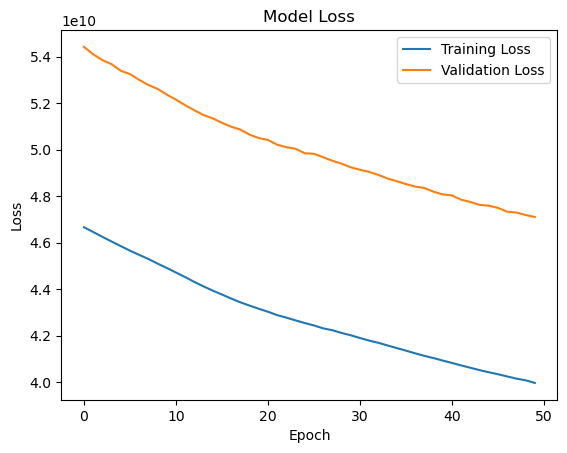

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


In [113]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

# Define a callback to record the loss after every epoch
history = History()

# Train the model with the callback
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[history])

# Plot the loss after every epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Print the model summary
print(model.summary())

# Save or log the model's summary along with the loss plot in your lab logbook
# You can save the loss plot as an image file and print the model summary to a text file, for example.


## Try different optimisations like changing model architecture, activation functions, training parameters.

In [114]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets with a validation split of 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)

Training set shapes: (17290, 20) (17290,)
Validation set shapes: (4323, 20) (4323,)
